# DataFrame 데이터 분석용 함수 사용하기 

In [1]:
import pandas as pd
import numpy as np

In [19]:
data = [[1.4, np.nan],
           [7.1, -4.5],
        [np.nan, np.nan],
        [0.75, -1.3]]
df = pd.DataFrame(data, columns=["one", "two"], index=["a", "b", "c", "d"])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


## sum() 
 - NaN는 배제하고 계산한다. ( R과 동일 )
 - skipna=False 를 지정해준다면 NaN을 배제하는 것을 Off한다. 

In [5]:
df.sum(axis=0) # 각 열의 합. 

one    9.25
two   -5.80
dtype: float64

In [7]:
df.sum(axis=1)  # 각 행의 합. 

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

In [9]:
df["one"].sum()

9.25

In [11]:
df.loc["b"].sum()

2.5999999999999996

In [13]:
df.mean(axis = 1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

# 통계 함수 

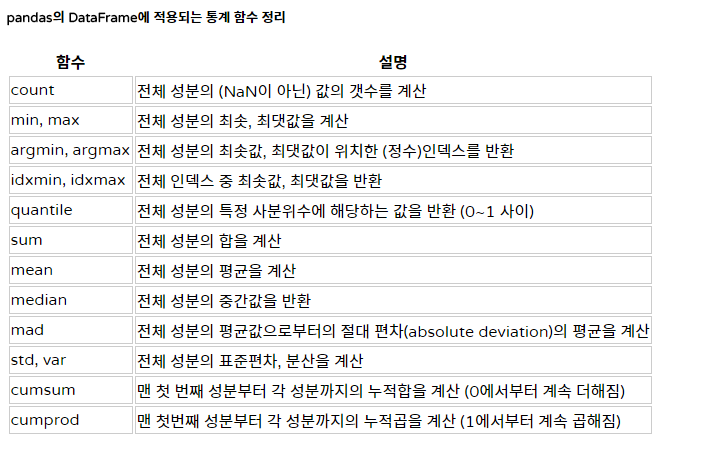

In [15]:
from IPython.display import Image
Image(filename='pandas/1.PNG')

In [17]:
one_mean = df.mean(axis=0)["one"]
two_min = df.min(axis=0)["two"]

In [21]:
df["one"] = df["one"].fillna(value=one_mean)
df["one"]

a    1.400000
b    7.100000
c    3.083333
d    0.750000
Name: one, dtype: float64

In [23]:
df["two"] = df["two"].fillna(value=two_min)
df["two"]

a   -4.5
b   -4.5
c   -4.5
d   -1.3
Name: two, dtype: float64

        DataFrame에서 특히 유용한 통계 함수 중 하나가, 상관 계수(correlation coefficient) 
        혹은 공분산(covariance)을 계산하는 함수입니다. 새로운 df2 DataFrame을 정의합니다.

In [26]:
df2 = pd.DataFrame(np.random.randn(6, 4),
                   columns=["A", "B", "C", "D"],
                   index=pd.date_range("20160701", periods=6))
df2

,A,B,C,D
2016-07-01,-0.525840,0.583120,-0.704524,-0.191900
2016-07-02,0.073782,-1.774452,-2.007110,1.391687
2016-07-03,-0.294634,0.742160,-1.571897,0.515517
2016-07-04,-0.345372,1.709994,-1.076583,-0.533021
2016-07-05,0.290417,-1.847967,-1.333950,-0.383954
2016-07-06,-0.885754,-0.591735,-0.425669,-1.643227


 - A열에 대한 B열 데이터의 상관 계수를 구할때

In [27]:
df2["A"].corr(df2["B"])

-0.52272740303085774

 - B열에 대한 C열 데이터의 공분산을 구할때. 

In [29]:
df2["B"].cov(df2["C"])

0.2922486730749444

In [31]:
df2.corr()

,A,B,C,D
A,1.000000,-0.522727,-0.787714,0.623459
B,-0.522727,1.000000,0.349326,-0.214726
C,-0.787714,0.349326,1.000000,-0.907611
D,0.623459,-0.214726,-0.907611,1.000000


In [33]:
df2.cov()

,A,B,C,D
A,0.176478,-0.318178,-0.191067,0.268433
B,-0.318178,2.099419,0.292249,-0.318873
C,-0.191067,0.292249,0.333384,-0.537100
D,0.268433,-0.318873,-0.537100,1.050426


# 정렬
 - index 기준 정렬
 - Value 기준 정렬. 

In [34]:
dates = df2.index
random_dates = np.random.permutation(dates)
df2 = df2.reindex(index=random_dates, columns=["D", "B", "C", "A"])
df2

,D,B,C,A
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417
2016-07-02,1.391687,-1.774452,-2.007110,0.073782
2016-07-06,-1.643227,-0.591735,-0.425669,-0.885754
2016-07-01,-0.191900,0.583120,-0.704524,-0.525840
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372
2016-07-03,0.515517,0.742160,-1.571897,-0.294634


In [36]:
df2.sort_index(axis=0) # 행 방향으로의 정렬 즉. index 열을 정렬. 

,D,B,C,A
2016-07-01,-0.191900,0.583120,-0.704524,-0.525840
2016-07-02,1.391687,-1.774452,-2.007110,0.073782
2016-07-03,0.515517,0.742160,-1.571897,-0.294634
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417
2016-07-06,-1.643227,-0.591735,-0.425669,-0.885754


In [38]:
df2.sort_index(axis=1)

,A,B,C,D
2016-07-05,0.290417,-1.847967,-1.333950,-0.383954
2016-07-02,0.073782,-1.774452,-2.007110,1.391687
2016-07-06,-0.885754,-0.591735,-0.425669,-1.643227
2016-07-01,-0.525840,0.583120,-0.704524,-0.191900
2016-07-04,-0.345372,1.709994,-1.076583,-0.533021
2016-07-03,-0.294634,0.742160,-1.571897,0.515517


In [40]:
df2.sort_index(axis=0, ascending=False) # 내림차순. 

,D,B,C,A
2016-07-06,-1.643227,-0.591735,-0.425669,-0.885754
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372
2016-07-03,0.515517,0.742160,-1.571897,-0.294634
2016-07-02,1.391687,-1.774452,-2.007110,0.073782
2016-07-01,-0.191900,0.583120,-0.704524,-0.525840


 - 값 기준 정렬.

In [42]:
df2

,D,B,C,A
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417
2016-07-02,1.391687,-1.774452,-2.007110,0.073782
2016-07-06,-1.643227,-0.591735,-0.425669,-0.885754
2016-07-01,-0.191900,0.583120,-0.704524,-0.525840
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372
2016-07-03,0.515517,0.742160,-1.571897,-0.294634


In [47]:
df2.sort_values(by="D") # D열을 기준으로 오른차순 

,D,B,C,A
2016-07-06,-1.643227,-0.591735,-0.425669,-0.885754
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417
2016-07-01,-0.191900,0.583120,-0.704524,-0.525840
2016-07-03,0.515517,0.742160,-1.571897,-0.294634
2016-07-02,1.391687,-1.774452,-2.007110,0.073782


In [51]:
df2.sort_values(by="B", ascending=False) # 내림 차순. 

,D,B,C,A
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372
2016-07-03,0.515517,0.742160,-1.571897,-0.294634
2016-07-01,-0.191900,0.583120,-0.704524,-0.525840
2016-07-06,-1.643227,-0.591735,-0.425669,-0.885754
2016-07-02,1.391687,-1.774452,-2.007110,0.073782
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417


In [53]:
df2["E"] = np.random.randint(0, 6, size=6)
df2["F"] = ["alpha", "beta", "gamma", "gamma", "alpha", "gamma"]
df2

,D,B,C,A,E,F
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417,0,alpha
2016-07-02,1.391687,-1.774452,-2.007110,0.073782,0,beta
2016-07-06,-1.643227,-0.591735,-0.425669,-0.885754,5,gamma
2016-07-01,-0.191900,0.583120,-0.704524,-0.525840,1,gamma
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372,0,alpha
2016-07-03,0.515517,0.742160,-1.571897,-0.294634,4,gamma


In [56]:
df2.sort_values(by=["E","F"]) # 2개를 기준으로 할때 앞쪽부터 정렬하고 뒤쪽 정렬 (sql 의 order by 와 동일하다 )

,D,B,C,A,E,F
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417,0,alpha
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372,0,alpha
2016-07-02,1.391687,-1.774452,-2.007110,0.073782,0,beta
2016-07-01,-0.191900,0.583120,-0.704524,-0.525840,1,gamma
2016-07-03,0.515517,0.742160,-1.571897,-0.294634,4,gamma
2016-07-06,-1.643227,-0.591735,-0.425669,-0.885754,5,gamma


# Unique() 
 - 중복제거된 값만 출력.

In [58]:
df2["F"].unique()

array(['alpha', 'beta', 'gamma'], dtype=object)

# Value_counts()

In [60]:
df2["F"].value_counts()

gamma    3
alpha    2
beta     1
Name: F, dtype: int64

# isin 

In [62]:
df2["F"].isin(["alpha","beta"])

2016-07-05     True
2016-07-02     True
2016-07-06    False
2016-07-01    False
2016-07-04     True
2016-07-03    False
Name: F, dtype: bool

In [64]:
df2.loc[df2["F"].isin(["alpha", "beta"]), :]

,D,B,C,A,E,F
2016-07-05,-0.383954,-1.847967,-1.333950,0.290417,0,alpha
2016-07-02,1.391687,-1.774452,-2.007110,0.073782,0,beta
2016-07-04,-0.533021,1.709994,-1.076583,-0.345372,0,alpha


# 사용자 정의 함수를  DF에 적용
 - apply함수

In [66]:
df3 = pd.DataFrame(np.random.randn(4, 3), columns=["b", "d", "e"],
                   index=["Seoul", "Incheon", "Busan", "Daegu"])
df3

,b,d,e
Seoul,0.398798,-0.372710,1.320342
Incheon,-0.198463,1.636045,0.324238
Busan,0.223647,1.073648,0.917408
Daegu,0.262740,-1.539835,1.326527


In [68]:
func = lambda x: x.max() - x.min()

In [71]:
df3.apply(func,axis=0) # 열을 기준으로 

b    0.597261
d    3.175880
e    1.002289
dtype: float64

In [72]:
df3.apply(func, axis=1) # 행을 기준으로 

Seoul      1.693052
Incheon    1.834509
Busan      0.850001
Daegu      2.866362
dtype: float64

# Pandas를 사용한 데이터 분석 맛보기
 - 읽고 분석하고 쓰고 

In [73]:
df = pd.read_csv("pandas/loan.csv", sep=",")

C:\Anaconda3\envs\work\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
df.shape

(887379, 74)

In [78]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

# Lending Club Loan dataset 분석하기
 
 - Lending Club Loan dataset의 주요 컬럼 요약
  
    loan_amnt: 대출자의 대출 총액

    funded_amnt: 해당 대출을 위해 모금된 총액

    issue_d: 대출을 위한 기금이 모금된 월

    loan_status: 대출의 현재 상태*

    title: 대출자에 의해 제공된 대출 항목

    purpose: 대출자에 의해 제공된 대출 목적

    emp_length: 대출자의 재직 기간

    grade: LC assigned loan grade**

    int_rate: 대출 이자율

    term: 대출 상품의 기간 (36-month vs. 60-month)


    * 불량 상태(bad status): "Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Default Receiver", "Late (16-30 days)", "Late (31-120 days)"

    ** LC loan grade 참고: https://www.lendingclub.com/public/rates-and-fees.action


In [90]:
df2 = df[["loan_amnt", "loan_status", 
          "grade", "int_rate", "term"]]

In [91]:
df2.head()

,loan_amnt,loan_status,grade,int_rate,term
0,5000.0,Fully Paid,B,10.65,36 months
1,2500.0,Charged Off,C,15.27,60 months
2,2400.0,Fully Paid,C,15.96,36 months
3,10000.0,Fully Paid,C,13.49,36 months
4,3000.0,Current,B,12.69,60 months


In [84]:
df2.tail()

,loan_amnt,loan_status,grade,int_rate,term
887374,10000.0,Current,B,11.99,36 months
887375,24000.0,Current,B,11.99,36 months
887376,13000.0,Current,D,15.99,60 months
887377,12000.0,Current,E,19.99,60 months
887378,20000.0,Current,B,11.99,36 months


In [92]:
df2["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [93]:
df2["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [95]:
df2["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [97]:
df2 = df2.dropna(how="any") # 하나라도 NA 일경우 Drop 
df2.shape

(887379, 5)

# '36개월 대출'과 '60개월 대출'의 대출 총액 파악

In [99]:
term_to_loan_amnt_dict = {}
uniq_terms = df2["term"].unique()

In [101]:
uniq_terms

array([' 36 months', ' 60 months'], dtype=object)

In [103]:
for term in uniq_terms:
    loan_amnt_sum = df2.loc[df2["term"] == term, "loan_amnt"].sum()
    term_to_loan_amnt_dict[term] = loan_amnt_sum
    
term_to_loan_amnt_dict

{' 36 months': 7752507375.0, ' 60 months': 5341004575.0}

In [104]:
term_to_loan_amnt = pd.Series(term_to_loan_amnt_dict)
term_to_loan_amnt

 36 months    7.752507e+09
 60 months    5.341005e+09
dtype: float64

# 각 대출 상태(불량/우량)에 따른 대출 등급 분포 파악

In [106]:
df2.head()

,loan_amnt,loan_status,grade,int_rate,term
0,5000.0,Fully Paid,B,10.65,36 months
1,2500.0,Charged Off,C,15.27,60 months
2,2400.0,Fully Paid,C,15.96,36 months
3,10000.0,Fully Paid,C,13.49,36 months
4,3000.0,Current,B,12.69,60 months


In [109]:
df2["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [111]:
total_status_category = df2["loan_status"].unique()
bad_status_category = total_status_category[[1, 3, 4, 5, 6, 8]]
bad_status_category

array(['Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

In [113]:
df2["bad_loan_status"] = df2["loan_status"].isin(bad_status_category)
df2.head()

,loan_amnt,loan_status,grade,int_rate,term,bad_loan_status
0,5000.0,Fully Paid,B,10.65,36 months,False
1,2500.0,Charged Off,C,15.27,60 months,True
2,2400.0,Fully Paid,C,15.96,36 months,False
3,10000.0,Fully Paid,C,13.49,36 months,False
4,3000.0,Current,B,12.69,60 months,False


In [115]:
bad_loan_status_to_grades = \
    df2.loc[df2["bad_loan_status"] == True, "grade"].value_counts()
bad_loan_status_to_grades.sort_index()
bad_loan_status_to_grades

C    19054
D    15859
B    13456
E     9745
F     4383
A     3663
G     1269
Name: grade, dtype: int64

# 대출 총액과 대출 이자율 간의 상관관계 파악

In [117]:
df2["loan_amnt"].corr(df2["int_rate"])

0.1450230992988395

# 파일 쓰기

In [119]:
bad_loan_status_to_grades.to_csv("bad_loan_status.csv", sep=",")

In [123]:
tmpDF = pd.read_csv("bad_loan_status.csv",sep=",", header=None)
tmpDF.head()

,0,1
0,C,19054
1,D,15859
2,B,13456
3,E,9745
4,F,4383
